<a href="https://colab.research.google.com/github/suvarna2024/100-pandas-puzzles/blob/master/proj2feynnfinal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving mcdonald.csv to mcdonald.csv


In [ ]:
mcdonalds=pd.read_csv("mcdonald.csv")
mcdonalds

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,2,49,Once a month,Male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1448,No,Yes,No,Yes,Yes,No,No,No,Yes,No,Yes,I hate it!-5,47,Once a year,Male
1449,Yes,Yes,No,Yes,No,No,Yes,Yes,No,Yes,No,2,36,Once a week,Female
1450,Yes,Yes,No,Yes,No,Yes,No,Yes,Yes,No,No,3,52,Once a month,Female
1451,Yes,Yes,No,No,No,Yes,Yes,Yes,No,Yes,No,4,41,Every three months,Male


In [ ]:
column_names=mcdonalds.columns.tolist()
column_names

['yummy',
 'convenient',
 'spicy',
 'fattening',
 'greasy',
 'fast',
 'cheap',
 'tasty',
 'expensive',
 'healthy',
 'disgusting',
 'Like',
 'Age',
 'VisitFrequency',
 'Gender']

In [ ]:
dimensions=mcdonalds.shape
dimensions

(1453, 15)

In [ ]:
mcdonalds.head(3)

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,1,62,Every three months,Female


In [ ]:
import pandas as pd
import numpy as np

md_x = (mcdonalds.iloc[:, 0:11] == "Yes").astype(int)
col_means = md_x.mean(axis=0).round(2)

print(col_means)


yummy         0.55
convenient    0.91
spicy         0.09
fattening     0.87
greasy        0.53
fast          0.90
cheap         0.60
tasty         0.64
expensive     0.36
healthy       0.20
disgusting    0.24
dtype: float64


In [ ]:
pca=PCA()
mc_pca=pca.fit(md_x)

print("Importance of Components:")
print(pd.DataFrame({
    "Standard deviation": mc_pca.explained_variance_,
    "Proportion of Variance": mc_pca.explained_variance_ratio_,
    "Cumulative Proportion": mc_pca.explained_variance_ratio_.cumsum()
}, index=["PC"+str(i+1) for i in range(md_x.shape[1])]))

Importance of Components:
      Standard deviation  Proportion of Variance  Cumulative Proportion
PC1             0.573124                0.299447               0.299447
PC2             0.369002                0.192797               0.492244
PC3             0.254641                0.133045               0.625290
PC4             0.159040                0.083096               0.708386
PC5             0.113842                0.059481               0.767866
PC6             0.096270                0.050300               0.818166
PC7             0.083925                0.043849               0.862015
PC8             0.075692                0.039548               0.901563
PC9             0.070358                0.036761               0.938323
PC10            0.061922                0.032353               0.970677
PC11            0.056123                0.029323               1.000000


In [ ]:
print("Standard deviations (1, .., p=11):")
print(np.round(mc_pca.explained_variance_, 1))

Standard deviations (1, .., p=11):
[0.6 0.4 0.3 0.2 0.1 0.1 0.1 0.1 0.1 0.1 0.1]


In [ ]:
print("Rotation (n x k) = (11 x 11):")
print(pd.DataFrame(mc_pca.components_, columns=md_x.columns))

Rotation (n x k) = (11 x 11):
       yummy  convenient     spicy  fattening    greasy      fast     cheap  \
0   0.476933    0.155332  0.006356  -0.116232 -0.304443  0.108493  0.337186   
1  -0.363790   -0.016414 -0.018809   0.034094  0.063839  0.086972  0.610633   
2   0.304444    0.062515  0.037019   0.322359  0.802373  0.064642  0.149310   
3   0.055162   -0.142425  0.197619  -0.354139  0.253960 -0.097363  0.118958   
4   0.307535   -0.277608 -0.070620   0.073405 -0.361399 -0.107930  0.128973   
5  -0.170738    0.347830  0.355087   0.406515 -0.209347  0.594632  0.103241   
6  -0.280519   -0.059738  0.707637  -0.385943  0.036170 -0.086846 -0.040449   
7  -0.013041    0.113079 -0.375934  -0.589622  0.138241  0.627799 -0.140060   
8  -0.572403    0.018465 -0.400280   0.160512  0.002847 -0.166197 -0.076069   
9   0.110284    0.665818  0.075634   0.005338 -0.008707 -0.239532 -0.428087   
10 -0.045439    0.541616 -0.141730  -0.250910 -0.001642 -0.339265  0.489283   

       tasty  expensi

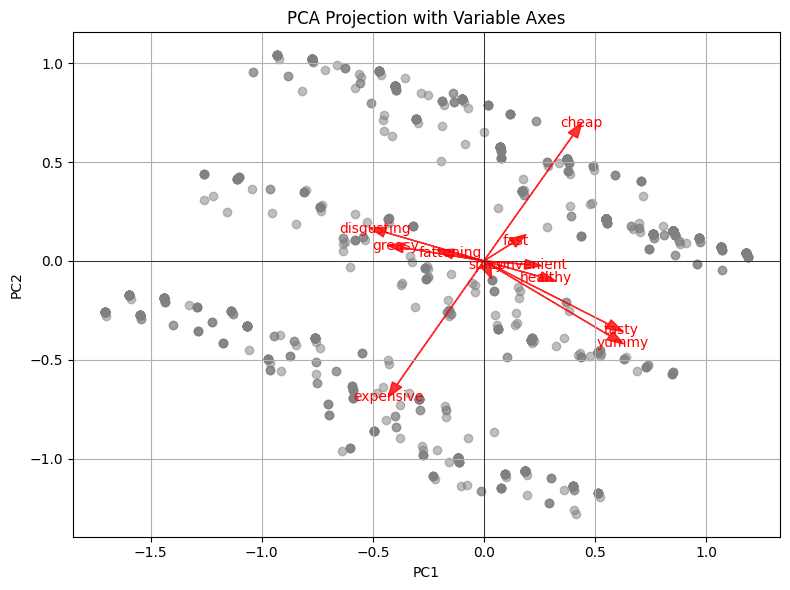

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

md_scores = pca.transform(md_x)
plt.figure(figsize=(8, 6))
plt.scatter(md_scores[:, 0], md_scores[:, 1], color='grey', alpha=0.5)

for i, (x, y) in enumerate(zip(pca.components_[0], pca.components_[1])):
    plt.arrow(0, 0, x * max(md_scores[:, 0]), y * max(md_scores[:, 1]),
              color='red', alpha=0.8, head_width=0.05)
    plt.text(x * max(md_scores[:, 0]) * 1.1, y * max(md_scores[:, 1]) * 1.1,
             md_x.columns[i], color='red', ha='center', va='center')

plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("PCA Projection with Variable Axes")
plt.grid(True)
plt.axhline(0, color='black', lw=0.5)
plt.axvline(0, color='black', lw=0.5)
plt.tight_layout()
plt.show()


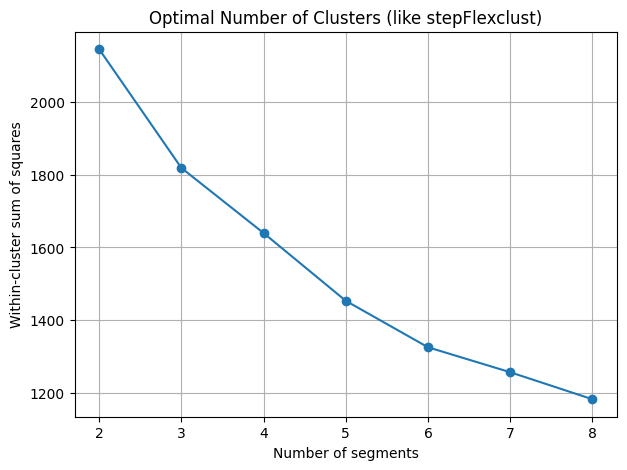

In [ ]:
#k-means
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import random

random.seed(1234)
np.random.seed(1234)

wcss = []
k_values = range(2, 9)

for k in k_values:
    best_inertia = np.inf
    for _ in range(10):
        km = KMeans(n_clusters=k, n_init=1, random_state=np.random.randint(0, 10000))
        km.fit(md_x)
        if km.inertia_ < best_inertia:
            best_inertia = km.inertia_
    wcss.append(best_inertia)
plt.figure(figsize=(7, 5))
plt.plot(k_values, wcss, marker='o')
plt.xlabel("Number of segments")
plt.ylabel("Within-cluster sum of squares")
plt.title("Optimal Number of Clusters (like stepFlexclust)")
plt.grid(True)
plt.show()


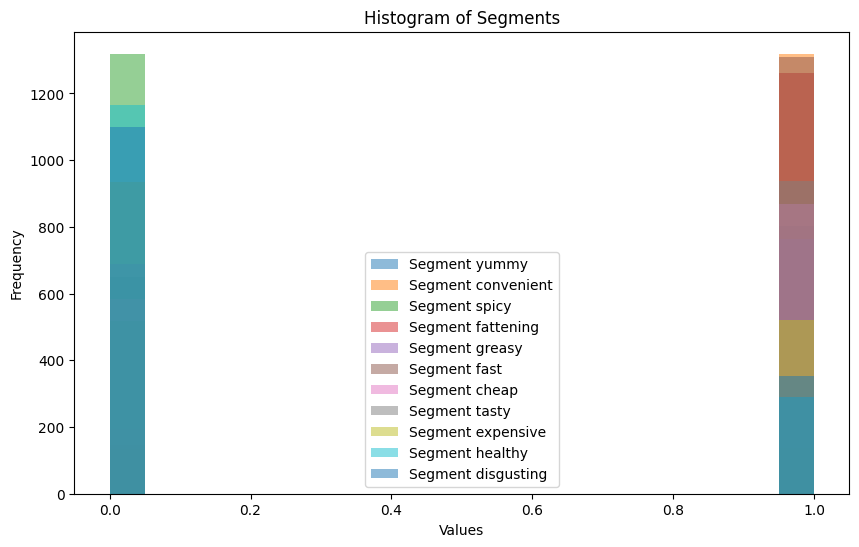

In [ ]:
plt.figure(figsize=(10, 6))
for segment, data in md_x.items():
    plt.hist(data, bins=20, alpha=0.5, label=f'Segment {segment}')

plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Histogram of Segments')
plt.legend()
plt.show()

Starting stability analysis with common elements ARI (this might take longer)...
Processing k = 2 segments...
  Bootstrap comparison 20/100 for k=2
  Bootstrap comparison 40/100 for k=2
  Bootstrap comparison 60/100 for k=2
  Bootstrap comparison 80/100 for k=2
  Bootstrap comparison 100/100 for k=2
  Finished k = 2. Collected 100 ARI scores. Avg ARI: 0.955
Processing k = 3 segments...
  Bootstrap comparison 20/100 for k=3
  Bootstrap comparison 40/100 for k=3
  Bootstrap comparison 60/100 for k=3
  Bootstrap comparison 80/100 for k=3
  Bootstrap comparison 100/100 for k=3
  Finished k = 3. Collected 100 ARI scores. Avg ARI: 0.877
Processing k = 4 segments...
  Bootstrap comparison 20/100 for k=4
  Bootstrap comparison 40/100 for k=4
  Bootstrap comparison 60/100 for k=4
  Bootstrap comparison 80/100 for k=4
  Bootstrap comparison 100/100 for k=4
  Finished k = 4. Collected 100 ARI scores. Avg ARI: 0.840
Processing k = 5 segments...
  Bootstrap comparison 20/100 for k=5
  Bootstrap com

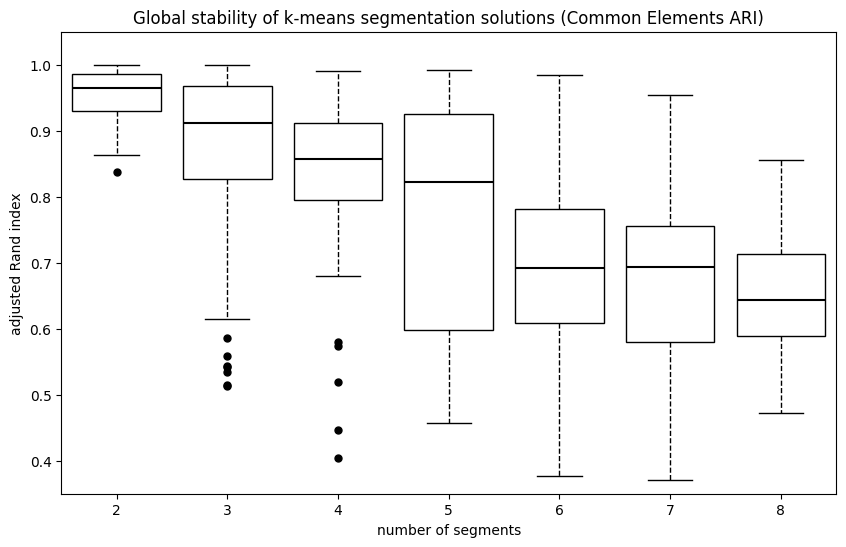

In [ ]:
# Stability Analysis and Boxplot with "Common Elements ARI"

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.utils import resample
from sklearn.metrics import adjusted_rand_score
import random

if 'md_x' not in locals() and 'mcdonalds' in locals():
    md_x_df = (mcdonalds.iloc[:, 0:11] == "Yes").astype(int)
    md_x_numpy = md_x_df.values
else:

    if isinstance(md_x, pd.DataFrame):
        md_x_numpy = md_x.values
    else:
        md_x_numpy = md_x
seed_value = 1234
random.seed(seed_value)
np.random.seed(seed_value)

# Parameters
n_bootstrap_comparisons = 100
n_init_kmeans = 10
k_range = range(2, 9)

stability_scores_for_plot = {k: [] for k in k_range}
original_indices = np.arange(md_x_numpy.shape[0])

print("Starting stability analysis with common elements ARI (this might take longer)...")

for k_val in k_range:
    print(f"Processing k = {k_val} segments...")
    aris_for_k = []
    for i in range(n_bootstrap_comparisons):
        if (i + 1) % 20 == 0:
            print(f"  Bootstrap comparison {i+1}/{n_bootstrap_comparisons} for k={k_val}")

        # Generate bootstrap sample 1 (indices and data)
        bootstrap_indices1 = resample(original_indices, replace=True, n_samples=len(original_indices), random_state=seed_value + i)
        data_bs1 = md_x_numpy[bootstrap_indices1]

        # Generate bootstrap sample 2 (indices and data)
        bootstrap_indices2 = resample(original_indices, replace=True, n_samples=len(original_indices), random_state=seed_value + i + n_bootstrap_comparisons) # Offset seed
        data_bs2 = md_x_numpy[bootstrap_indices2]

        # Run KMeans on bootstrap sample 1
        kmeans1 = KMeans(n_clusters=k_val, n_init=n_init_kmeans, random_state=seed_value + i*2, algorithm='lloyd')
        labels_bs1_full = kmeans1.fit_predict(data_bs1)

        # Run KMeans on bootstrap sample 2
        kmeans2 = KMeans(n_clusters=k_val, n_init=n_init_kmeans, random_state=seed_value + i*2 + 1, algorithm='lloyd')
        labels_bs2_full = kmeans2.fit_predict(data_bs2)


        map_orig_idx_to_label_bs1 = {}
        for original_idx, label in zip(bootstrap_indices1, labels_bs1_full):
            if original_idx not in map_orig_idx_to_label_bs1:
                 map_orig_idx_to_label_bs1[original_idx] = label


        map_orig_idx_to_label_bs2 = {}
        for original_idx, label in zip(bootstrap_indices2, labels_bs2_full):
            if original_idx not in map_orig_idx_to_label_bs2:
                 map_orig_idx_to_label_bs2[original_idx] = label


        common_original_indices = list(set(bootstrap_indices1).intersection(set(bootstrap_indices2)))

        if len(common_original_indices) < 2:

            continue

        labels1_common = [map_orig_idx_to_label_bs1[orig_idx] for orig_idx in common_original_indices]
        labels2_common = [map_orig_idx_to_label_bs2[orig_idx] for orig_idx in common_original_indices]

        if len(labels1_common) >= 2:
            ari = adjusted_rand_score(labels1_common, labels2_common)
            aris_for_k.append(ari)

    stability_scores_for_plot[k_val] = aris_for_k
    if aris_for_k:
        print(f"  Finished k = {k_val}. Collected {len(aris_for_k)} ARI scores. Avg ARI: {np.mean(aris_for_k):.3f}")
    else:
        print(f"  Finished k = {k_val}. No ARI scores collected (e.g., due to insufficient common points).")


print("Stability analysis complete.")

#Plotting the Boxplot
df_plot_seaborn = pd.DataFrame([
    {"Number of Segments": k, "Adjusted Rand Index": score}
    for k, scores_list in stability_scores_for_plot.items()
    for score in scores_list

if df_plot_seaborn.empty:
    print("No stability scores were computed successfully. Cannot generate plot.")
else:
    print("\nDescriptive statistics of calculated Adjusted Rand Index scores (common elements method):")
    print(df_plot_seaborn.groupby("Number of Segments")["Adjusted Rand Index"].describe())

    plt.figure(figsize=(10, 6))
    sns.boxplot(x="Number of Segments", y="Adjusted Rand Index", data=df_plot_seaborn,
                color="white",
                medianprops={'color': 'black', 'linewidth': 1.5},
                whiskerprops={'color': 'black', 'linestyle': '--'},
                capprops={'color': 'black'},
                flierprops={'marker': 'o', 'markerfacecolor': 'black', 'markersize': 5, 'markeredgecolor': 'black'},
                boxprops={'edgecolor': 'black'}
               )

    plt.xlabel("number of segments")
    plt.ylabel("adjusted Rand index")
    plt.title("Global stability of k-means segmentation solutions (Common Elements ARI)")

    min_val = df_plot_seaborn["Adjusted Rand Index"].min()
    max_val = df_plot_seaborn["Adjusted Rand Index"].max()

    y_lower_bound = 0.35
    y_upper_bound = 1.05

    if max_val < y_lower_bound or min_val > y_upper_bound :
        y_lower_bound = min_val - 0.05 * abs(min_val) if min_val !=0 else -0.05
        y_upper_bound = max_val + 0.05 * abs(max_val) if max_val !=0 else 0.05
        if y_upper_bound - y_lower_bound < 0.1:
            y_upper_bound = y_lower_bound + 0.1

    plt.ylim(y_lower_bound, y_upper_bound)

    plt.grid(False)
    plt.show()


Segment Means (Proportion of 'Yes' for k=4):
               yummy  convenient     spicy  fattening    greasy      fast  \
Cluster_k4                                                                  
0           0.019231    0.906593  0.082418   0.931319  0.596154  0.956044   
1           0.020833    0.679167  0.075000   0.916667  0.708333  0.741667   
2           0.966229    0.981238  0.084428   0.778612  0.348968  0.958724   
3           0.873418    0.958861  0.136076   0.905063  0.607595  0.857595   

               cheap     tasty  expensive   healthy  disgusting  
Cluster_k4                                                       
0           0.901099  0.285714   0.013736  0.074176    0.329670  
1           0.066667  0.079167   0.895833  0.062500    0.725000  
2           0.923077  0.973734   0.018762  0.339587    0.046904  
3           0.107595  0.930380   0.917722  0.208861    0.107595  


<ipython-input-18-c8e182239e01>:66: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g = sns.catplot(


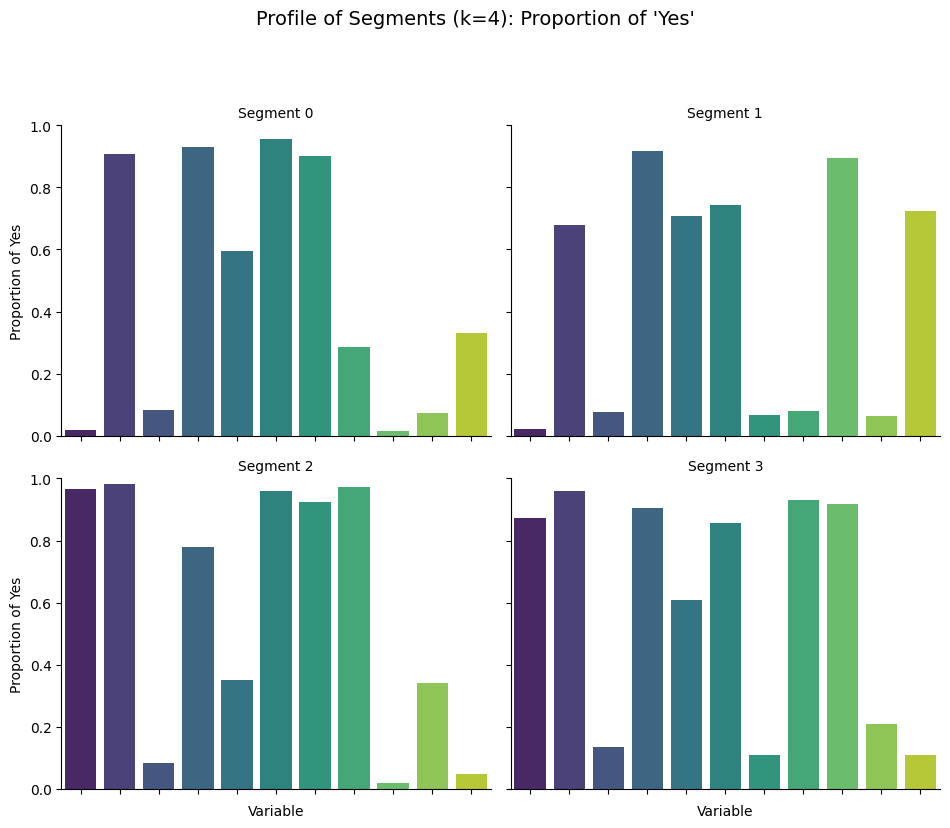

In [ ]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

if 'md_x' not in locals() and 'mcdonalds' in locals():
    md_x_df = (mcdonalds.iloc[:, 0:11] == "Yes").astype(int)
elif 'md_x' in locals():
    if isinstance(md_x, pd.DataFrame):
        md_x_df = md_x
    else:
        md_x_df = pd.DataFrame(md_x, columns=mcdonalds.iloc[:, 0:11].columns)
else:
    print("Error: 'mcdonalds' DataFrame or 'md_x' (0/1 data) not found. Please define it.")


k_for_histogram = 4
n_init_kmeans_final = 10
seed_value = 1234
np.random.seed(seed_value)
random.seed(seed_value)

kmeans_model_k4 = KMeans(n_clusters=k_for_histogram,
                         n_init=n_init_kmeans_final,
                         random_state=seed_value,
                         algorithm='lloyd')
cluster_labels_k4 = kmeans_model_k4.fit_predict(md_x_df)

md_x_with_k4_clusters = md_x_df.copy()
md_x_with_k4_clusters['Cluster_k4'] = cluster_labels_k4

segment_means_k4 = md_x_with_k4_clusters.groupby('Cluster_k4').mean()

print("\nSegment Means (Proportion of 'Yes' for k=4):")
print(segment_means_k4)

segment_means_k4_melted = segment_means_k4.reset_index().melt(
    id_vars='Cluster_k4',
    var_name='Variable',
    value_name='Proportion of Yes'
)

g = sns.catplot(
    x="Variable",
    y="Proportion of Yes",
    col="Cluster_k4",
    data=segment_means_k4_melted,
    kind="bar",
    col_wrap=2,
    height=4,
    aspect=1.2,
    palette="viridis",
    sharex=True,
    sharey=True
)

g.set_xticklabels(rotation=45, ha='right')
g.set_titles("Segment {col_name}")
g.set(ylim=(0, 1))

plt.suptitle(f"Profile of Segments (k={k_for_histogram}): Proportion of 'Yes'", y=1.03, fontsize=14)
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()



Starting SLSW stability analysis for k=4 (this may take a while)...
  SLSW Bootstrap iteration 20/100
  SLSW Bootstrap iteration 40/100
  SLSW Bootstrap iteration 60/100
  SLSW Bootstrap iteration 80/100
  SLSW Bootstrap iteration 100/100
SLSW stability analysis complete.

Descriptive statistics of SLSW Jaccard scores:
                count      mean       std       min       25%       50%  \
Segment Number                                                            
1               100.0  0.853418  0.100363  0.210256  0.821502  0.847024   
2               100.0  0.942587  0.076589  0.419214  0.928095  0.968644   
3               100.0  0.898227  0.053752  0.534940  0.870080  0.909208   
4               100.0  0.903650  0.080685  0.704000  0.846493  0.946731   

                     75%       max  
Segment Number                      
1               0.925036  0.979675  
2               0.980952  1.000000  
3               0.923501  0.991453  
4               0.970764  1.000000  


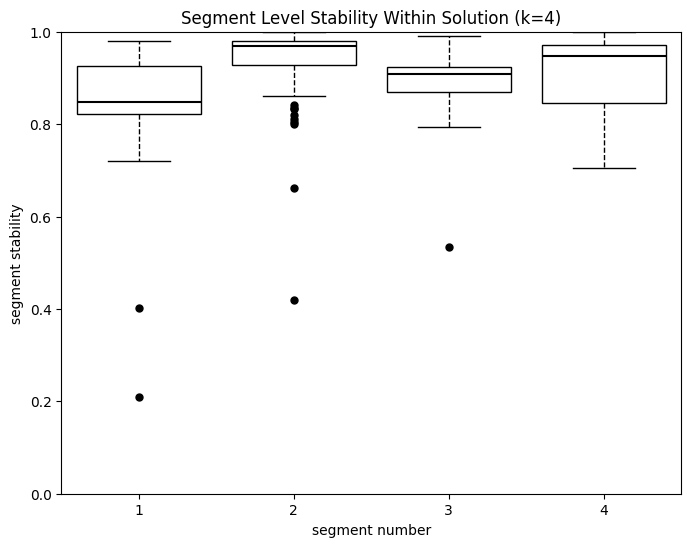

In [ ]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.utils import resample
from sklearn.metrics import jaccard_score
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

if 'md_x' not in locals() and 'mcdonalds' in locals():
    md_x_df = (mcdonalds.iloc[:, 0:11] == "Yes").astype(int)
    md_x_numpy = md_x_df.values
elif 'md_x' in locals():
    if isinstance(md_x, pd.DataFrame):
        md_x_df = md_x
        md_x_numpy = md_x.values
    else:
        md_x_numpy = md_x
        md_x_df = pd.DataFrame(md_x, columns=mcdonalds.iloc[:, 0:11].columns if 'mcdonalds' in locals() else [f'Var{i+1}' for i in range(md_x.shape[1])])
else:
    print("Error: 'mcdonalds' DataFrame or 'md_x' (0/1 data) not found.")

k_target = 4
n_init_kmeans_final = 10
seed_value = 1234
np.random.seed(seed_value)
random.seed(seed_value)

kmeans_final_k4 = KMeans(n_clusters=k_target,
                         n_init=n_init_kmeans_final,
                         random_state=seed_value,
                         algorithm='lloyd')
cluster_labels_k4_final = kmeans_final_k4.fit_predict(md_x_numpy)

n_bootstrap_slsw = 100
n_init_kmeans_bootstrap = 10

slsw_stability_scores = {segment_id: [] for segment_id in range(k_target)}
original_indices_all = np.arange(md_x_numpy.shape[0])

print(f"\nStarting SLSW stability analysis for k={k_target} (this may take a while)...")

for i_boot in range(n_bootstrap_slsw):
    if (i_boot + 1) % 20 == 0:
        print(f"  SLSW Bootstrap iteration {i_boot+1}/{n_bootstrap_slsw}")


    bootstrap_indices = resample(original_indices_all, replace=True, n_samples=len(original_indices_all),
                                 random_state=seed_value + i_boot)
    data_bs = md_x_numpy[bootstrap_indices]

    kmeans_bs = KMeans(n_clusters=k_target,
                       n_init=n_init_kmeans_bootstrap,
                       random_state=seed_value + i_boot + n_bootstrap_slsw,
                       algorithm='lloyd')
    labels_bs_full = kmeans_bs.fit_predict(data_bs)

    for s_orig_id in range(k_target):

        original_indices_in_segment_s = original_indices_all[cluster_labels_k4_final == s_orig_id]


        common_orig_idx_in_s_and_bs = []
        positions_in_bootstrap_for_common = []


        bootstrap_indices_set = set(bootstrap_indices)
        map_orig_idx_to_bs_positions = {orig_idx: [] for orig_idx in bootstrap_indices_set}
        for bs_pos, orig_idx in enumerate(bootstrap_indices):
            map_orig_idx_to_bs_positions[orig_idx].append(bs_pos)

        for orig_idx_s in original_indices_in_segment_s:
            if orig_idx_s in bootstrap_indices_set:
                common_orig_idx_in_s_and_bs.append(orig_idx_s)

                positions_in_bootstrap_for_common.append(map_orig_idx_to_bs_positions[orig_idx_s][0])


        if len(common_orig_idx_in_s_and_bs) < 2:
            slsw_stability_scores[s_orig_id].append(0.0)
            continue


        labels_of_common_points_in_bs_clustering = labels_bs_full[positions_in_bootstrap_for_common]


        if not labels_of_common_points_in_bs_clustering.size:
            slsw_stability_scores[s_orig_id].append(0.0)
            continue

        modal_bs_cluster_id = Counter(labels_of_common_points_in_bs_clustering).most_common(1)[0][0]


        set_A_orig_indices = set(common_orig_idx_in_s_and_bs)


        set_B_orig_indices = set(bootstrap_indices[labels_bs_full == modal_bs_cluster_id])

        intersection_count = len(set_A_orig_indices.intersection(set_B_orig_indices))
        union_count = len(set_A_orig_indices.union(set_B_orig_indices))

        jaccard = intersection_count / union_count if union_count > 0 else 0.0
        slsw_stability_scores[s_orig_id].append(jaccard)

print("SLSW stability analysis complete.")

df_slsw_plot = pd.DataFrame([
    {"Segment Number": str(seg_id + 1), "Segment Stability (Jaccard)": score} # Segments 1 to 4
    for seg_id, scores_list in slsw_stability_scores.items()
    for score in scores_list
])

if df_slsw_plot.empty:
    print("No SLSW stability scores were computed. Cannot generate plot.")
else:
    print("\nDescriptive statistics of SLSW Jaccard scores:")
    print(df_slsw_plot.groupby("Segment Number")["Segment Stability (Jaccard)"].describe())

    plt.figure(figsize=(8, 6))
    sns.boxplot(x="Segment Number", y="Segment Stability (Jaccard)", data=df_slsw_plot,
                color="white",
                medianprops={'color': 'black', 'linewidth': 1.5},
                whiskerprops={'color': 'black', 'linestyle': '--'},
                capprops={'color': 'black'},
                flierprops={'marker': 'o', 'markerfacecolor': 'black', 'markersize': 5, 'markeredgecolor': 'black'},
                boxprops={'edgecolor': 'black'}
               )
    plt.xlabel("segment number")
    plt.ylabel("segment stability")
    plt.title(f"Segment Level Stability Within Solution (k={k_target})")
    plt.ylim(0, 1)
    plt.grid(False)
    plt.show()

Number of components: 2
Converged: True
Log likelihood: 7.672278681921454
AIC: -21985.641849663745
BIC: -21167.027071810353
Number of components: 3
Converged: True
Log likelihood: 11.078578848691945
AIC: -31728.350134298795
BIC: -30497.787274686918
Number of components: 4
Converged: True
Log likelihood: 13.52852352432298
AIC: -38691.889375918254
BIC: -37049.37843454789
Number of components: 5
Converged: True
Log likelihood: 16.520265726365
AIC: -47229.89220081669
BIC: -45175.43317768785
Number of components: 6
Converged: True
Log likelihood: 18.172335295104553
AIC: -51874.81514662455
BIC: -49408.408041737224
Number of components: 7
Converged: True
Log likelihood: 18.203563599142456
AIC: -51809.97746232207
BIC: -48931.62227567627
Number of components: 8
Converged: True
Log likelihood: 17.138547978439423
AIC: -48558.620425277244
BIC: -45268.31715687296


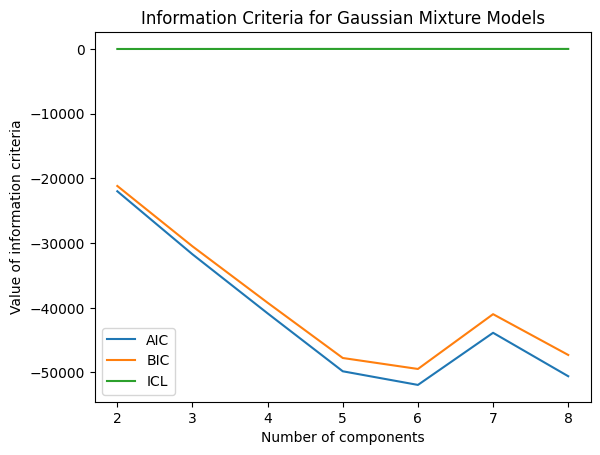

In [ ]:
from sklearn.mixture import GaussianMixture
np.random.seed(1234)

for k in range(2, 9):
    model = GaussianMixture(n_components=k, n_init=10)
    model.fit(md_x)
    print(f"Number of components: {k}")
    print(f"Converged: {model.converged_}")
    print(f"Log likelihood: {model.lower_bound_}")
    print(f"AIC: {model.aic(md_x)}")
    print(f"BIC: {model.bic(md_x)}")
aic_values = []
bic_values = []
icl_values = []

for k in range(2, 9):
    model = GaussianMixture(n_components=k, n_init=10)
    model.fit(md_x)
    aic_values.append(model.aic(md_x))
    bic_values.append(model.bic(md_x))
    icl_values.append(model.lower_bound_)

plt.plot(range(2, 9), aic_values, label='AIC')
plt.plot(range(2, 9), bic_values, label='BIC')
plt.plot(range(2, 9), icl_values, label='ICL')
plt.xlabel('Number of components')
plt.ylabel('Value of information criteria')
plt.title('Information Criteria for Gaussian Mixture Models')
plt.legend()
plt.show()

In [ ]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
import random



seed_value = 1234
np.random.seed(seed_value)
random.seed(seed_value)


k_val_kmeans = 4
n_init_kmeans = 10

kmeans_model_k4 = KMeans(n_clusters=k_val_kmeans,
                         n_init=n_init_kmeans,
                         random_state=seed_value,
                         algorithm='lloyd')
kmeans_labels_k4 = kmeans_model_k4.fit_predict(md_x_df)


mixture_labels_m4a = kmeans_labels_k4

contingency_table_m4a = pd.crosstab(
    pd.Series(kmeans_labels_k4, name='kmeans_MD.k4'),
    pd.Series(mixture_labels_m4a, name='mixture_MD.m4a_from_kmeans')
)

print("\n--- Cross-tabulation: K-Means (MD.k4) vs. Mixture (MD.m4a from K-Means) for k=4 ---")
print(contingency_table_m4a)




--- Cross-tabulation: K-Means (MD.k4) vs. Mixture (MD.m4a from K-Means) for k=4 ---
mixture_MD.m4a_from_kmeans    0    1    2    3
kmeans_MD.k4                                  
0                           364    0    0    0
1                             0  240    0    0
2                             0    0  533    0
3                             0    0    0  316


<Figure size 1000x800 with 0 Axes>

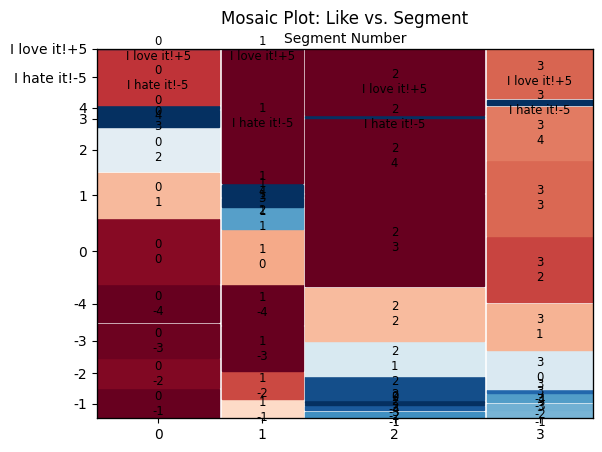

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.mosaicplot import mosaic
from scipy.stats import chi2_contingency

contingency_table_like = pd.crosstab(cluster_labels_k4, mcdonalds['Like'])

chi2, p, dof, expected = chi2_contingency(contingency_table_like)

residuals = (contingency_table_like - expected) / expected**0.5
residuals.index = residuals.index.astype(str)
residuals.columns = residuals.columns.astype(str)
props = lambda key: {
    'color': plt.cm.RdBu_r((residuals.loc[key[0], key[1]] + 4) / 8)
}

plt.figure(figsize=(10, 8))
mosaic(contingency_table_like.stack(), title='Mosaic Plot: Like vs. Segment', properties=props)
plt.xlabel("Segment Number")
plt.ylabel("Like Score")
plt.show()

<ipython-input-31-f22d202428e7>:35: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X_prep_df['Like_n'].fillna(X_prep_df['Like_n'].median(), inplace=True) # Handle any NaNs from conversion


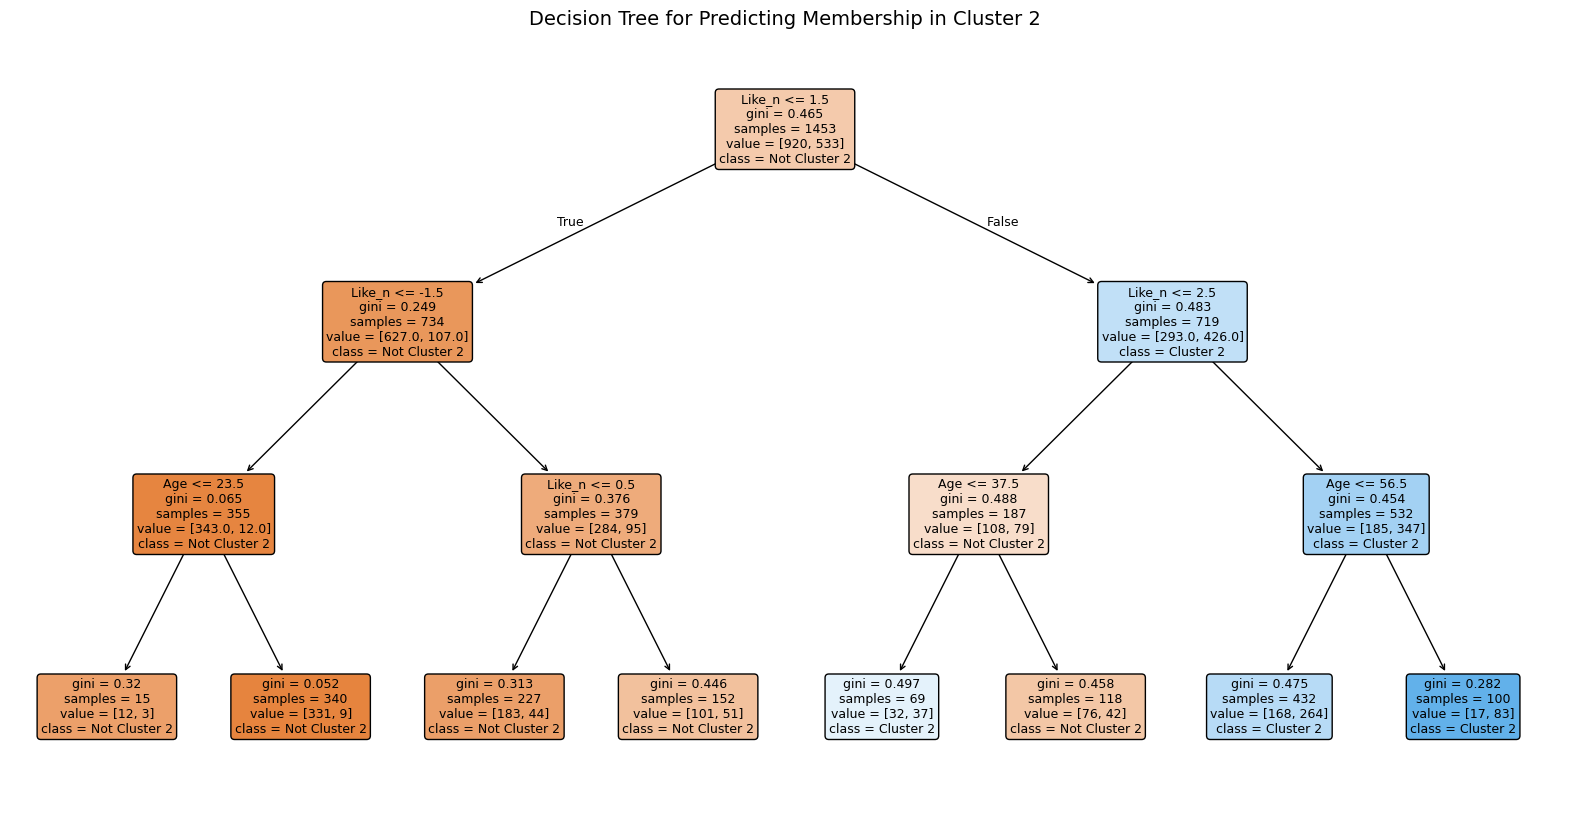

In [ ]:
from sklearn.cluster import KMeans
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

def simplified_convert_like_to_numeric(value):
    try:

        return int(value)
    except ValueError:

        if isinstance(value, str):
            parts = value.split('!')
            if len(parts) > 1:
                try:
                    return int(parts[-1])
                except ValueError:
                    return np.nan
        return np.nan
kmeans_k4_model = KMeans(n_clusters=4, random_state=1234, n_init=10)
kmeans_k4_labels = kmeans_k4_model.fit_predict(md_x)


target_cluster_label = 2
y_tree = (kmeans_k4_labels == target_cluster_label).astype(int)

X_prep_df = mcdonalds[['Age', 'VisitFrequency', 'Gender']].copy()
X_prep_df['Like_n'] = mcdonalds['Like'].apply(simplified_convert_like_to_numeric)
X_prep_df['Like_n'].fillna(X_prep_df['Like_n'].median(), inplace=True)

feature_cols = ['Like_n', 'Age', 'VisitFrequency', 'Gender']
X_tree_encoded = pd.get_dummies(X_prep_df[feature_cols], columns=['VisitFrequency', 'Gender'], drop_first=False)


tree_classifier = DecisionTreeClassifier(random_state=1234, max_depth=3)
tree_classifier.fit(X_tree_encoded, y_tree)

plt.figure(figsize=(20, 10))
plot_tree(tree_classifier,
          feature_names=X_tree_encoded.columns.tolist(),
          class_names=[f'Not Cluster {target_cluster_label}', f'Cluster {target_cluster_label}'],
          filled=True, rounded=True, fontsize=9)
plt.title(f"Decision Tree for Predicting Membership in Cluster {target_cluster_label}", fontsize=14)
plt.show()

Mean VisitFrequency (numeric) per cluster (k4):
 k4_cluster
0    1.708791
1    1.408333
2    3.000000
3    2.860759
Name: VisitFrequency_numeric, dtype: float64
------------------------------
Mean Like_n per cluster (k4):
 k4_cluster
0   -1.175824
1   -2.670833
2    2.834897
3    2.174051
Name: Like_n, dtype: float64
------------------------------
Mean proportion of Females per cluster (k4):
 k4_cluster
0    0.585165
1    0.420833
2    0.607880
3    0.474684
Name: Female_numeric, dtype: float64
------------------------------


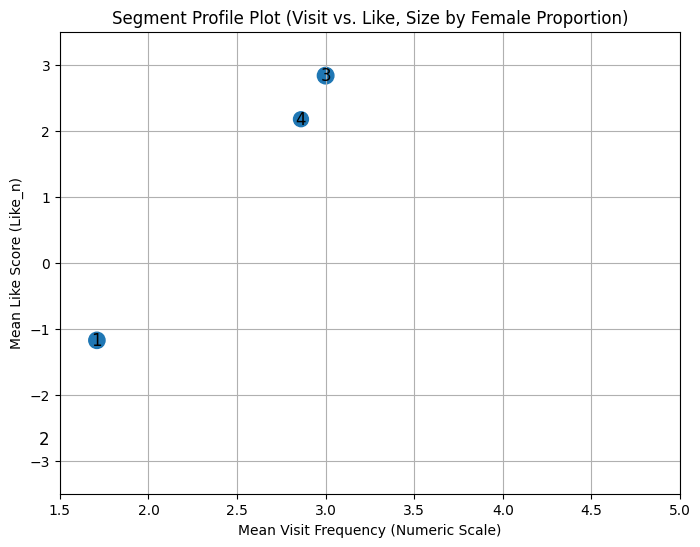

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

kmeans_k4_model = KMeans(n_clusters=4, random_state=1234, n_init=10)
kmeans_k4_labels = kmeans_k4_model.fit_predict(md_x)

analysis_df = mcdonalds.copy()
analysis_df['k4_cluster'] = kmeans_k4_labels

visit_freq_mapping = {
    'Never': 0,
    'Once a year': 1,
    'Every three months': 2,
    'Once a month': 3,
    'Once a week': 4,
    'More than once a week': 5
}
analysis_df['VisitFrequency_numeric'] = analysis_df['VisitFrequency'].map(visit_freq_mapping)

visit_means = analysis_df.groupby('k4_cluster')['VisitFrequency_numeric'].mean()
print("Mean VisitFrequency (numeric) per cluster (k4):\n", visit_means)
print("-" * 30)

if 'Like_n' not in analysis_df.columns:
    def convert_like_to_numeric(value):
        if isinstance(value, (int, float)):
            return value
        if isinstance(value, str):
            if 'I hate it!' in value:
                try: return int(value.split('!')[-1])
                except: return np.nan
            if 'I love it!' in value:
                try: return int(value.split('!')[-1])
                except: return np.nan
            try: return int(value)
            except ValueError: return np.nan
        return np.nan
    analysis_df['Like_n'] = analysis_df['Like'].apply(convert_like_to_numeric)
    if analysis_df['Like_n'].isnull().any():
        median_like_n = analysis_df['Like_n'].median()
        analysis_df['Like_n'].fillna(median_like_n, inplace=True)
        print(f"Filled NaNs in 'Like_n' with median: {median_like_n} for this step.")

like_means = analysis_df.groupby('k4_cluster')['Like_n'].mean()
print("Mean Like_n per cluster (k4):\n", like_means)
print("-" * 30)

analysis_df['Female_numeric'] = (analysis_df['Gender'] == 'Female').astype(int)

female_means = analysis_df.groupby('k4_cluster')['Female_numeric'].mean()
print("Mean proportion of Females per cluster (k4):\n", female_means)
print("-" * 30)

plot_visit = visit_means.values
plot_like = like_means.values
plot_female_prop = female_means.values


base_size = 20
scale_factor = 200
point_sizes = base_size + (plot_female_prop * scale_factor)


plt.figure(figsize=(8, 6))
plt.scatter(plot_visit, plot_like, s=point_sizes)

plt.xlim(1.5, 5)
plt.ylim(-3.5, 3.5)


for i, cluster_label in enumerate(visit_means.index):
    plt.text(plot_visit[i], plot_like[i], str(cluster_label + 1), fontsize=12, ha='center', va='center')

plt.xlabel("Mean Visit Frequency (Numeric Scale)")
plt.ylabel("Mean Like Score (Like_n)")
plt.title("Segment Profile Plot (Visit vs. Like, Size by Female Proportion)")
plt.grid(True)
plt.show()